In [62]:
import pandas as pd
import numpy as np
import math
import os
os.getcwd()

'D:\\k2analytics\\datafile'

In [2]:
os.chdir("D:/k2analytics/datafile")

In [3]:
inc_exp = pd.read_csv("Inc_Exp_Data.csv")
inc_exp.head(3)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1


In [4]:
## What is the MEAN Monthly Household Expense?
inc_exp.Mthly_HH_Expense.mean()

18818.0

In [5]:
## What is the MEDIAN Monthly Household Expense?
inc_exp.Mthly_HH_Expense.median()

15500.0

In [6]:
## What is the MODE of Monthly Household Expense?
inc_exp.Mthly_HH_Expense.mode()

0    25000
dtype: int64

In [7]:
inc_exp.iloc[:,0:5].std().to_frame().T 
## to_frame is to get the gridlines
## T is for transpose

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,26097.908979,12090.216824,1.517382,6241.434948,320135.792123


In [8]:
inc_exp.iloc[:,0:5].var().to_frame().T 
## to_frame is to get the gridlines
## T is for transpose

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,6.811009e+08,1.461733e+08,2.302449,3.895551e+07,1.024869e+11


In [9]:
## Describe to get Descriptive Stats for all variables
inc_exp.describe(include = 'all')

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50,50.000000
unique,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,Graduate,NaN
freq,NaN,NaN,NaN,NaN,NaN,19,NaN
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,NaN,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,NaN,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,NaN,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,NaN,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,NaN,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,NaN,2.000000


In [10]:
# Descriptive Statistics

In [11]:
## Frequency Distribution
freq = inc_exp['Highest_Qualified_Member'].value_counts().to_frame()
freq.T

,Graduate,Professional,Under-Graduate,Post-Graduate,Illiterate
Highest_Qualified_Member,19,10,10,6,5


In [12]:
## Proportions
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Highest_Qualified_Member,count,prop
0,Graduate,19,0.38
1,Professional,10,0.20
2,Under-Graduate,10,0.20
3,Post-Graduate,6,0.12
4,Illiterate,5,0.10


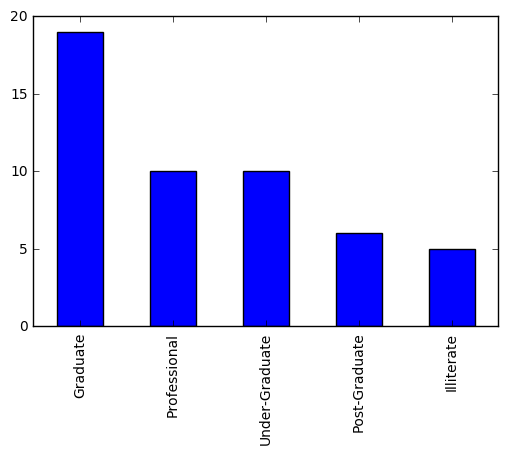

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

##histogram
inc_exp['Highest_Qualified_Member'].value_counts().plot(kind='bar')

In [14]:
##CrossTable
pd.crosstab(inc_exp.Highest_Qualified_Member, 
            inc_exp.No_of_Earning_Members,margins =True)

No_of_Earning_Members,1,2,3,4,All
Highest_Qualified_Member,,,,,
Graduate,14,3,2,0,19
Illiterate,4,1,0,0,5
Post-Graduate,5,0,1,0,6
Professional,4,5,0,1,10
Under-Graduate,6,3,1,0,10
All,33,12,4,1,50


In [15]:
def percConvert(ser):
    return round(ser / float(ser[-1]),2)
cr_tb_per = pd.crosstab(inc_exp.Highest_Qualified_Member,
                        inc_exp.No_of_Earning_Members,
                        margins =True).apply(percConvert, axis=1)
cr_tb_per.iloc[0:len(cr_tb_per)-1,0:len(cr_tb_per)-2]

No_of_Earning_Members,1,2,3,4
Highest_Qualified_Member,,,,
Graduate,0.74,0.16,0.11,0.0
Illiterate,0.80,0.20,0.00,0.0
Post-Graduate,0.83,0.00,0.17,0.0
Professional,0.40,0.50,0.00,0.1
Under-Graduate,0.60,0.30,0.10,0.0


In [16]:
#Getting percentile distribution for all numeric variables
inc_exp['Annual_HH_Income'].quantile([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

0.01      71902.8
0.05     104220.0
0.10     165360.0
0.25     258750.0
0.50     447420.0
0.75     594720.0
0.90    1036320.0
0.95    1147944.0
0.99    1362840.0
1.00    1404000.0
Name: Annual_HH_Income, dtype: float64

In [18]:
## Box Plot 1
##pip install plotly --ignore-installed nbformat
import plotly.graph_objs as go
import plotly

plotly.offline.plot({
    "data": [go.Box(x=inc_exp.Annual_HH_Income)],
    "layout": go.Layout(title="Annual Income Box Plot")
}, auto_open=True)


'file://D:\\k2analytics\\datafile\\temp-plot.html'

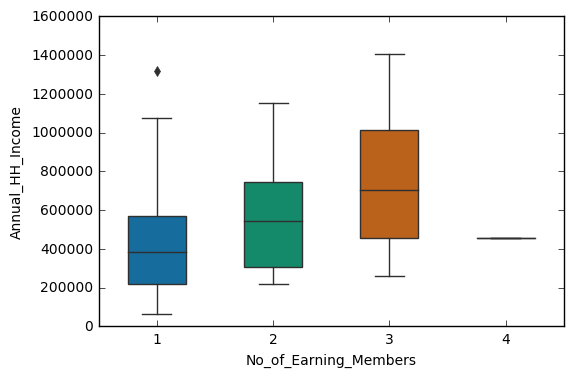

In [19]:
## Box Plot 2
import seaborn as sns

bplot = sns.boxplot(y='Annual_HH_Income', x='No_of_Earning_Members', 
                 data=inc_exp, 
                 width=0.5,
                 palette="colorblind")

In [20]:
## Summary
inc_exp.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [21]:
## Creating thousand samples each having 30 records
sample_dst = pd.DataFrame()
for i in range(1,1001):
    temp = inc_exp.iloc[np.random.randint(0, len(inc_exp), size=30)]
    temp['sample_no'] = i
    sample_dst = sample_dst.append(temp)
    del temp

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,sample_no
16,25000,20000,3,3500,261000,Graduate,1,1
14,24000,10000,4,0,244800,Graduate,2,1
19,30000,13000,4,0,385200,Graduate,1,1
47,100000,30000,6,0,1404000,Graduate,3,1
9,20000,9000,4,0,220800,Under-Graduate,2,1


In [76]:
sample_dst.head(61)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,sample_no
16,25000,20000,3,3500,261000,Graduate,1,1
14,24000,10000,4,0,244800,Graduate,2,1
19,30000,13000,4,0,385200,Graduate,1,1
47,100000,30000,6,0,1404000,Graduate,3,1
9,20000,9000,4,0,220800,Under-Graduate,2,1
18,29000,6600,2,2000,348000,Graduate,1,1
15,25000,12300,3,0,246000,Graduate,1,1
8,19000,9000,2,0,218880,Under-Graduate,1,1
3,10000,2000,1,0,97200,Illiterate,1,1
4,12500,12000,2,3000,147000,Graduate,1,1


In [77]:
sample_mean = sample_dst.groupby('sample_no', as_index=False).agg({
          "Mthly_HH_Income": "mean", "Mthly_HH_Expense": "mean",
          "No_of_Fly_Members": "mean","Emi_or_Rent_Amt": "mean",
          "Annual_HH_Income": "mean"          
          })

In [78]:
###Rearrange the columns
sample_mean = sample_mean.reindex(
    columns=['sample_no', 'Mthly_HH_Income', 'Mthly_HH_Expense',
             'No_of_Fly_Members', 'Emi_or_Rent_Amt', 'Annual_HH_Income']
)

In [79]:
sample_mean.shape

(1000, 6)

In [80]:
sample_mean.head()

,sample_no,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,1,32366.666667,14916.666667,3.900000,2083.333333,370076
1,2,44633.333333,24976.666667,4.500000,4500.000000,520968
2,3,40083.333333,15613.333333,4.300000,2233.333333,474540
3,4,39796.666667,16310.000000,4.133333,4633.333333,457650
4,5,40710.000000,17666.666667,3.900000,1300.000000,491780


In [36]:
###Sample mean of mean
smean = pd.DataFrame(sample_mean.iloc[:,1:6].mean().to_frame())
smean.reset_index(inplace=True)
smean.columns = ['s_vars','smean']

In [37]:
###Population Mean
pmean = pd.DataFrame(inc_exp.iloc[:,0:5].mean().to_frame())
pmean.reset_index(inplace=True)
pmean.columns = ['p_vars','pmean']

In [38]:
###concat sample_mean and population_mean
spmean = pd.concat([smean.reset_index(drop=True), pmean], axis=1)

In [39]:
### Ratio of sample_mean and population_mean
spmean['ratio'] = spmean.smean / spmean.pmean
spmean

,s_vars,smean,p_vars,pmean,ratio
0,Mthly_HH_Income,41637.373333,Mthly_HH_Income,41558.00,1.001910
1,Mthly_HH_Expense,18886.460000,Mthly_HH_Expense,18818.00,1.003638
2,No_of_Fly_Members,4.066300,No_of_Fly_Members,4.06,1.001552
3,Emi_or_Rent_Amt,3065.950000,Emi_or_Rent_Amt,3060.00,1.001944
4,Annual_HH_Income,491094.011000,Annual_HH_Income,490019.04,1.002194


In [56]:
## Standard Deviation
s_se = sample_mean.iloc[:,1:6].std().to_frame()
s_se.reset_index(inplace=True)
s_se.columns = ['s_vars','s_se']

In [57]:
p_sd = inc_exp.iloc[:,0:5].std().to_frame()
p_sd.reset_index(inplace=True)
p_sd.columns = ['p_vars','p_sd']

In [58]:
###concat sample_mean and population_mean
se_psd = pd.concat([s_se.reset_index(drop=True), p_sd], axis=1)

In [72]:
se_psd['clt_se'] = se_psd['p_sd'] / math.sqrt(30)
se_psd['ratio'] = se_psd['s_se'] / se_psd['clt_se']

In [73]:
se_psd

,s_vars,s_se,p_vars,p_sd,clt_se,ratio
0,Mthly_HH_Income,4681.635796,Mthly_HH_Income,26097.908979,4764.804484,0.982545
1,Mthly_HH_Expense,2169.921254,Mthly_HH_Expense,12090.216824,2207.361493,0.983038
2,No_of_Fly_Members,0.272200,No_of_Fly_Members,1.517382,0.277035,0.982548
3,Emi_or_Rent_Amt,1184.079872,Emi_or_Rent_Amt,6241.434948,1139.524904,1.039100
4,Annual_HH_Income,57295.552089,Annual_HH_Income,320135.792123,58448.531603,0.980274


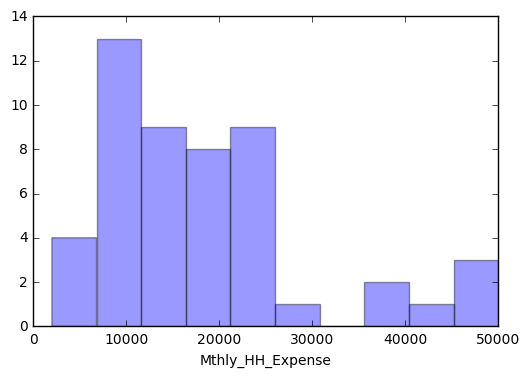

In [81]:
#### Other histogram optional
import seaborn as sns

###Hist
sns.distplot(inc_exp.Mthly_HH_Expense,kde=False, bins=10)

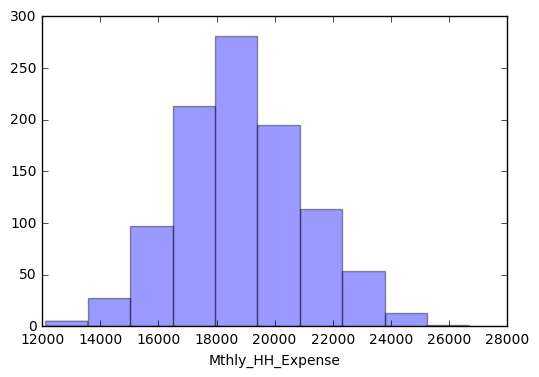

In [83]:
sns.distplot(sample_mean.Mthly_HH_Expense,kde=False, bins=10)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



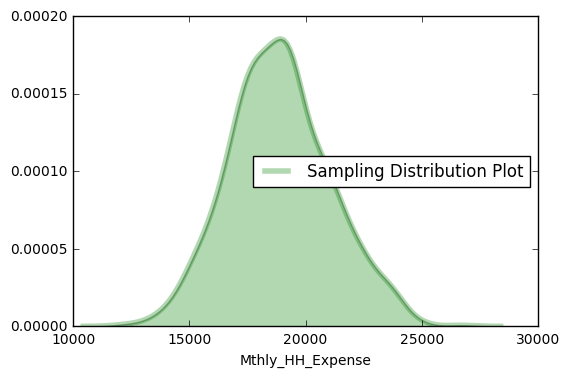

In [88]:
###Density
sns.distplot(sample_mean.Mthly_HH_Expense,hist = False,kde=True, bins=10, 
             label= "Sampling Distribution Plot",
             kde_kws={"color": "g", "alpha":0.3, "linewidth": 4, "shade":True })


In [91]:
## Validating Empirical Rule between SD and Mean for Normally Distributed Data

inc_Mean = round(sample_mean.Mthly_HH_Income.mean(),2)
inc_SD = round(sample_mean.Mthly_HH_Income.std(),2)

sample_mean_1SD_subset = sample_mean[
    (sample_mean['Mthly_HH_Income'] >= inc_Mean - 1 * inc_SD) 
    & (sample_mean['Mthly_HH_Income'] <= inc_Mean + 1 * inc_SD)] 

sample_mean_2SD_subset = sample_mean[
    (sample_mean['Mthly_HH_Income'] >= inc_Mean - 2 * inc_SD) 
    & (sample_mean['Mthly_HH_Income'] <= inc_Mean + 2 * inc_SD)] 

sample_mean_3SD_subset = sample_mean[
    (sample_mean['Mthly_HH_Income'] >= inc_Mean - 3 * inc_SD) 
    & (sample_mean['Mthly_HH_Income'] <= inc_Mean + 3 * inc_SD)] 


print('Tot_Cnt =', len(sample_mean))
print('SD1_Cnt =', len(sample_mean_1SD_subset))
print('SD2_Cnt =', len(sample_mean_2SD_subset))
print('SD3_Cnt =', len(sample_mean_3SD_subset))



Tot_Cnt = 1000
SD1_Cnt = 682
SD2_Cnt = 954
SD3_Cnt = 998


In [2]:
import scipy.stats as stats
x = 100
mu = 70
sd = 10

z_score = (x - mu) / sd

pValue = 1 - stats.norm.cdf(z_score)
pValue

0.0013498980316301035

In [3]:
import scipy.stats as stats
x = 80
mu = 70
sd = 10

z_score = (x - mu) / sd

pValue = stats.norm.cdf(z_score)
pValue

0.84134474606854293

In [4]:
import scipy.stats as stats
x1 = 100
x2 = 80
mu = 70
sd = 10

z1 = (x1 - mu) / sd
p1 = stats.norm.cdf(z1)
z2 = (x2 - mu) / sd
p2 = stats.norm.cdf(z2)

pValue = p1 -p2
pValue

0.15730535589982697

In [9]:
import scipy.stats as stats
from math import sqrt
xbar = 30000
mu = 29000
sd = 8000
n = 400

se = sd / sqrt(n)
z = (xbar - mu) / se

## Upper (Right) tail test
pValue = 1 - stats.norm.cdf(z)
pValue

0.0062096653257761592

In [10]:
## t Test
## Soft dring example

## Null Hypothesis H0: mu = 12 
## Alternate Hypothesis Ha: < 12
## Alpha Threshold : 0.025 (Lower Tail Test)

from math import sqrt
import scipy.stats as stats
mu = 12
n = 49
xbar = 11.88
sd = 0.35
se = sd/sqrt(n)

tstat = (xbar - mu)/se
df = n-1
p = (stats.t.cdf(tstat,df=df))
p

0.010161432879917198

In [11]:
## Gym example - One Sample t Test

## Null Hypothesis H0: mu = 5 
## Alternate Hypothesis Ha: < 5
## Alpha Threshold : 0.025 (Lower Tail Test)

from math import sqrt
import scipy.stats as stats

mu = 5
n = 30
xbar = 4.25
sd = 3
se = sd/sqrt(n)

tstat = (xbar - mu)/se
df = n-1
p = (stats.t.cdf(tstat,df=df))
p

0.09070772054026538

In [24]:
## Hypothesis Testing to validate sample is representative of population
## Null Hypothesis : sample mean = population mean
## Alternate Hypothesis : sample mean ≠ population mean
## Let us import the dataset and draw a sample
import random
import pandas as pd
import numpy as np
from scipy import stats

popln = pd.read_csv("d:/k2analytics/datafile/hypothesis_test.csv")
popln['random'] = np.random.random(len(popln))
sample_dst = popln.loc[popln['random'] <= 0.1]

print("Variable : Age")
print("population size = ", len(popln), "; Population Mean :",round(popln.Age.mean(),4))
print("sample size = ", len(sample_dst), "Sample Mean:", round(sample_dst.Age.mean(),4))

Variable : Age
population size =  20000 ; Population Mean : 38.3962
sample size =  1859 Sample Mean: 38.4368


In [25]:
age_1s_ttest_pValue = stats.ttest_1samp(sample_dst.Age, popln.Age.mean())
print("t Test:", age_1s_ttest_pValue)

t Test: Ttest_1sampResult(statistic=0.18457512709373533, pvalue=0.85358243963750491)


In [26]:
scr_1s_ttest_pValue = stats.ttest_1samp(sample_dst.SCR, popln.SCR.mean())
print("t Test:", scr_1s_ttest_pValue)

t Test: Ttest_1sampResult(statistic=-1.0052800726597826, pvalue=0.31489290770837836)


In [27]:
bal_1s_ttest_pValue = stats.ttest_1samp(sample_dst.Balance, popln.Balance.mean())
print("t Test:", bal_1s_ttest_pValue)

t Test: Ttest_1sampResult(statistic=0.29369518914781023, pvalue=0.76902363291385079)


In [28]:
txns_1s_ttest_pValue = stats.ttest_1samp(sample_dst.No_OF_CR_TXNS, popln.No_OF_CR_TXNS.mean())
print("t Test:", txns_1s_ttest_pValue)

t Test: Ttest_1sampResult(statistic=-0.29334563930728191, pvalue=0.76929073233259593)


In [32]:
## Independent t Test - two samples
## Student Study Hours example
## Hyp. test - Is there significant different is Study Hours of Boys vs Girls
## Assume alpha = 0.05

In [31]:
## Data Import
stdata = pd.read_csv("d:/k2analytics/datafile/Students_Study_Hours.csv")
stdata.describe()

,Boys,Girls
count,15.000000,15.000000
mean,7.400000,7.900000
std,0.828079,0.686607
min,6.000000,6.500000
25%,7.000000,7.500000
50%,7.500000,8.000000
75%,7.750000,8.250000
max,9.000000,9.000000


(array([ 1.,  2.,  0.,  4.,  0.,  4.,  1.,  0.,  2.,  1.]),
 array([ 6. ,  6.3,  6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ]),
 <a list of 10 Patch objects>)

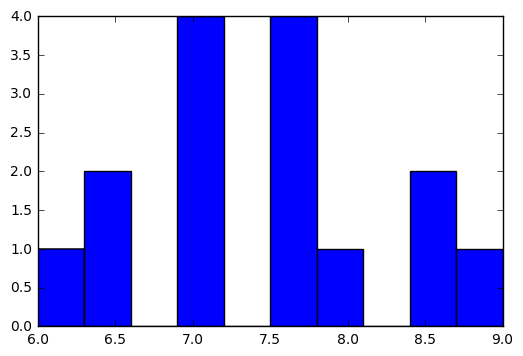

In [34]:
from matplotlib import pyplot
%matplotlib inline
pyplot.hist(stdata.Boys)

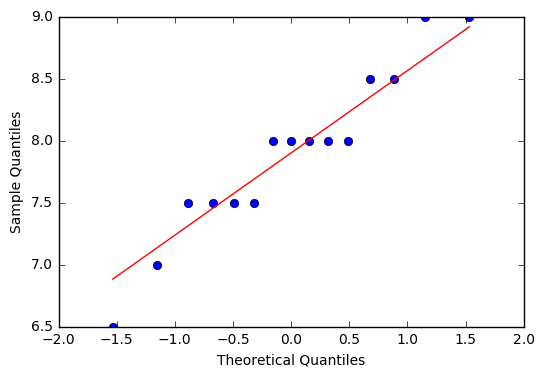

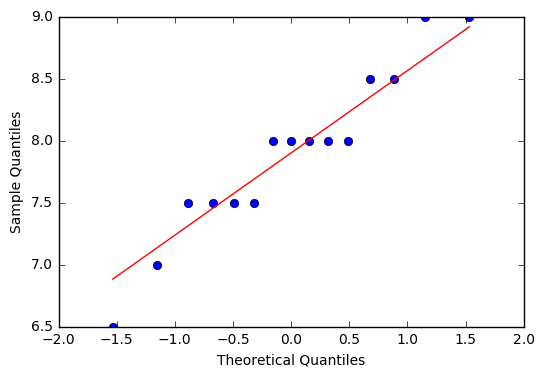

In [40]:
from statsmodels.graphics.gofplots import qqplot
qqplot(stdata.Girls, line='s')

In [44]:
## normality test
## p <= alpha: reject H0, not normal.
## p > alpha: fail to reject H0, normal.

from scipy.stats import shapiro
stat, p = shapiro(stdata.Boys)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.954, p=0.587


In [45]:
stat, p = shapiro(stdata.Girls)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.945, p=0.455


In [55]:
## Levene test for Equal Variance
## p <= alpha: reject H0, not equal variance.
## p > alpha: fail to reject H0, equal variance.
import statistics as stats
print("Std. Dev of Boys", stats.stdev(stdata.Boys))
print("Std. Dev of Girls", stats.stdev(stdata.Girls))

from scipy.stats import levene
levene(stdata.Girls, stdata.Boys)

Std. Dev of Boys 0.828078671210825
Std. Dev of Girls 0.6866065623255951


LeveneResult(statistic=0.55445544554455417, pvalue=0.46270719488407219)

In [56]:
from scipy.stats import ttest_ind
ttest = ttest_ind(stdata.Girls, stdata.Boys, equal_var=True)
ttest

Ttest_indResult(statistic=1.8002057495577388, pvalue=0.082611709782988235)

In [73]:
# Calculate the mean difference and 95% confidence interval
from scipy.stats import t
N1 = len(stdata.Girls)
N2 = len(stdata.Boys)
df = (N1 + N2 - 2)
std1 = stdata.Girls.std()
std2 = stdata.Boys.std()
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 

diff_mean = stdata.Girls.mean() - stdata.Boys.mean()
MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)


print ("\nThe difference between groups is \n\
       {:3.3f} [{:3.3f} to {:3.3f}] (mean [95% CI])".format(
        diff_mean, diff_mean - MoE, diff_mean + MoE))


The difference between groups is 
       0.500 [-0.069 to 1.069] (mean [95% CI])


In [77]:
stscore = pd.read_csv("d:/k2analytics/datafile/Students_Score.csv")
stscore.head()
stscore[['Before_Score','After_Score']].describe()

,Before_Score,After_Score
count,20.000000,20.000000
mean,18.200000,20.500000
std,3.679245,4.322524
min,10.000000,14.000000
25%,16.000000,17.500000
50%,18.000000,19.000000
75%,21.000000,24.000000
max,25.000000,30.000000


In [ ]:
stscore[['Before_Score','After_Score']].plot(kind='box')

Statistics=0.942, p=0.260


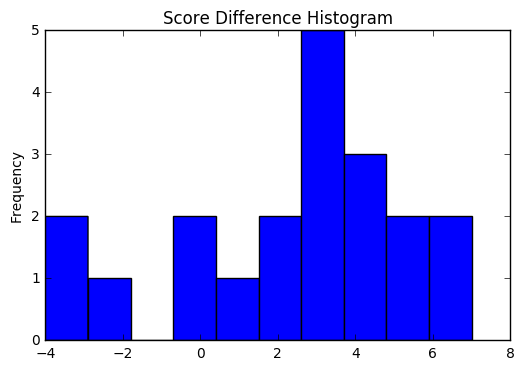

In [89]:
## Test for Normality 
stscore.diff = stscore.After_Score - stscore.Before_Score
stscore.diff.plot(kind='hist', title= 'Score Difference Histogram')

from scipy.stats import shapiro
stat, p = shapiro(stscore.diff)
print('Statistics=%.3f, p=%.3f' % (stat, p))

In [ ]:
from scipy.stats import ttest_rel
two_sample = ttest_rel(stscore.After_Score, stscore.Before_Score)
two_sample

Statistics=0.942, p=0.260
t Test: Ttest_1sampResult(statistic=3.5423247901415582, pvalue=0.0021758554894179454)


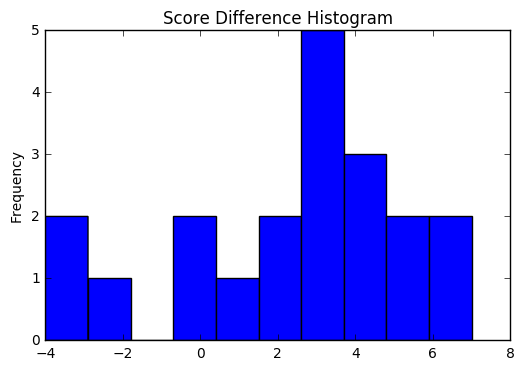

In [88]:
## Other approach. Compute the difference and perform 1 sample t test with mean 0
import scipy.stats

diff_1s_ttest_pValue = scipy.stats.ttest_1samp(stscore.diff, 0)
print("t Test:", diff_1s_ttest_pValue)

In [4]:
## ANOVA
import random
import pandas as pd
import numpy as np
from scipy import stats

dst = pd.read_csv("d:/k2analytics/datafile/hypothesis_test.csv")
dst.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C16505,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,C17241,0,52,M,117288.96,SAL,17,>50,768,13
2,C18802,0,31,F,259827.44,SENP,8,31-35,816,5
3,C19289,0,45,F,26677.55,PROF,14,41-45,353,18
4,C14028,0,39,F,43440.31,SENP,1,36-40,751,31


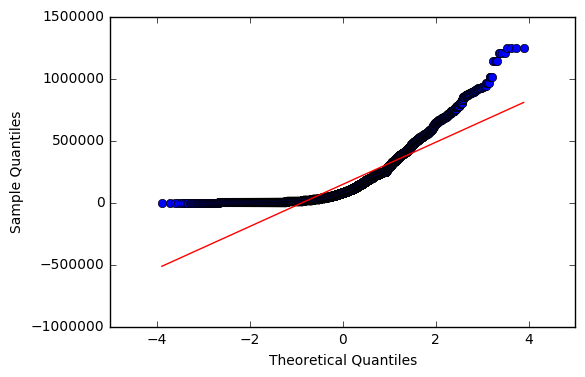

In [10]:
from statsmodels.graphics.gofplots import qqplot
qqplot(dst.Balance, line='s')

In [22]:
## Bartlett test of homogenity of variances
## Null Hypothesis : Homogeneous
## Alternate Hypothesis : Not Homogeneous
from scipy.stats import bartlett
bartlett(
    dst.loc[dst.Occupation == "SAL", "Balance"],
    dst.loc[dst.Occupation == "SELF-EMP", "Balance"],
    dst.loc[dst.Occupation == "PROF", "Balance"],
    dst.loc[dst.Occupation == "SENP", "Balance"]
    )


BartlettResult(statistic=96.400530988785505, pvalue=9.2322478791830984e-21)

In [47]:
%matplotlib inline
dst.boxplot("Balance", 
            by ="Occupation", 
            figsize=(4, 4) 
           )

123.819694494
1.83156513719e-79


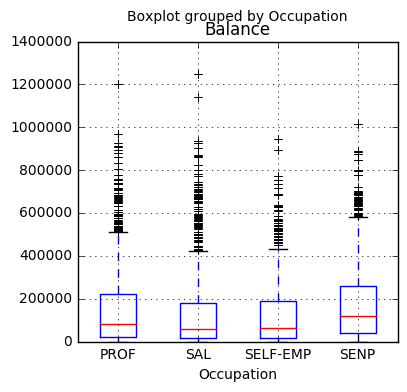

In [45]:
dst["bal_cap"] = dst["Balance"].map(
        lambda x:400000  
        if x>400000 else x)

In [57]:
from scipy.stats import f_oneway
 
F, p = f_oneway(
    dst.loc[dst.Occupation == "SAL", "Balance"],
    dst.loc[dst.Occupation == "SELF-EMP", "Balance"],
    dst.loc[dst.Occupation == "PROF", "Balance"],
    dst.loc[dst.Occupation == "SENP", "Balance"]
    )
print(F)
print(p)

123.819694494
1.83156513719e-79


In [ ]:
from scipy.stats import bartlett
bartlett(
    dst.loc[dst.Occupation == "SAL", "bal_cap"],
    dst.loc[dst.Occupation == "SELF-EMP", "bal_cap"],
    dst.loc[dst.Occupation == "PROF", "bal_cap"],
    dst.loc[dst.Occupation == "SENP", "bal_cap"]
    )

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Balance ~ Occupation',
                data=dst).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                  sum_sq       df           F        PR(>F)
Occupation  1.051773e+13      3.0  123.819694  1.831565e-79
Residual    5.661793e+14  19996.0         NaN           NaN


In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(dst['Balance'], dst['Occupation'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

     Multiple Comparison of Means - Tukey HSD,FWER=0.05     
 group1   group2    meandiff     lower       upper    reject
------------------------------------------------------------
  PROF     SAL    -23151.2296 -31288.9331 -15013.5262  True 
  PROF   SELF-EMP -18592.1778 -28065.2784  -9119.0772  True 
  PROF     SENP    34199.9152  25877.3022  42522.5282  True 
  SAL    SELF-EMP  4559.0518   -4797.0438  13915.1474 False 
  SAL      SENP    57351.1448  49161.9582  65540.3314  True 
SELF-EMP   SENP    52792.093   43274.7302  62309.4557  True 
------------------------------------------------------------
['PROF' 'SAL' 'SELF-EMP' 'SENP']


In [61]:
## Kurskal-Wallis test
## Rank all data from all groups together; i.e., rank the data from 1 to N ignoring group membership. 
## Assign any tied values the average of the ranks they would have received had they not been tied.

from scipy.stats import kruskal
stat, p = kruskal(
    dst.loc[dst.Occupation == "SAL", "Balance"],    dst.loc[dst.Occupation == "SELF-EMP", "Balance"],
    dst.loc[dst.Occupation == "PROF", "Balance"],    dst.loc[dst.Occupation == "SENP", "Balance"]
    )
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=582.543, p=0.000
Different distributions (reject H0)


In [2]:
## Socio economic status problem
import numpy as np
from scipy.stats import chi2_contingency
obs = np.array([[45, 25, 10], [100, 50, 50], [9, 7, 24], [10, 25, 45]])
print(obs)
chi2, p, dof, expected = chi2_contingency(obs)
chi2_contingency(obs)

[[ 45  25  10]
 [100  50  50]
 [  9   7  24]
 [ 10  25  45]]


(67.171649234966594, 1.5523544426660833e-12, 6, array([[ 32.8,  21.4,  25.8],
        [ 82. ,  53.5,  64.5],
        [ 16.4,  10.7,  12.9],
        [ 32.8,  21.4,  25.8]]))

In [4]:
import pandas as pd
import numpy as np
from scipy import stats

dst = pd.read_csv("d:/k2analytics/datafile/hypothesis_test.csv")

In [7]:
pd.crosstab(dst.Occupation, dst.Target, 
            rownames=['Occupation'], 
            colnames=['Target'])

Target,0,1
Occupation,,
PROF,5028,435
SAL,5426,413
SELF-EMP,2858,508
SENP,4955,377


In [8]:
chi2_contingency(pd.crosstab(dst.Occupation, dst.Target))

(214.91608360091237,
 2.521429184052133e-46,
 3,
 array([[ 4989.63105,   473.36895],
        [ 5333.05065,   505.94935],
        [ 3074.3361 ,   291.6639 ],
        [ 4869.9822 ,   462.0178 ]]))